<a href="https://colab.research.google.com/github/savioratharv/Compute_tasks/blob/main/Compute_Task_A6_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree 

[Dataset](https://drive.google.com/file/d/1EeorIZFT2JSM_KeFgnkwD_TqafeuoxNB/view?usp=sharing)

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


**Loading Data**

In [ ]:

# load dataset
df=pd.read_csv('diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

**Splitting Data**

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 32)

**Building Decision Tree Model**

create a Decision Tree Model using Scikit-learn with default parametes

In [ ]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# Train Decision Tree Classifer
classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)

**Evaluating Model**

In [ ]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[100  23]
 [ 30  39]]


0.7239583333333334

**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.



In [ ]:
df_plot=df.drop('Outcome',axis=1)

In [ ]:
!pip install graphviz
!pip install six
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


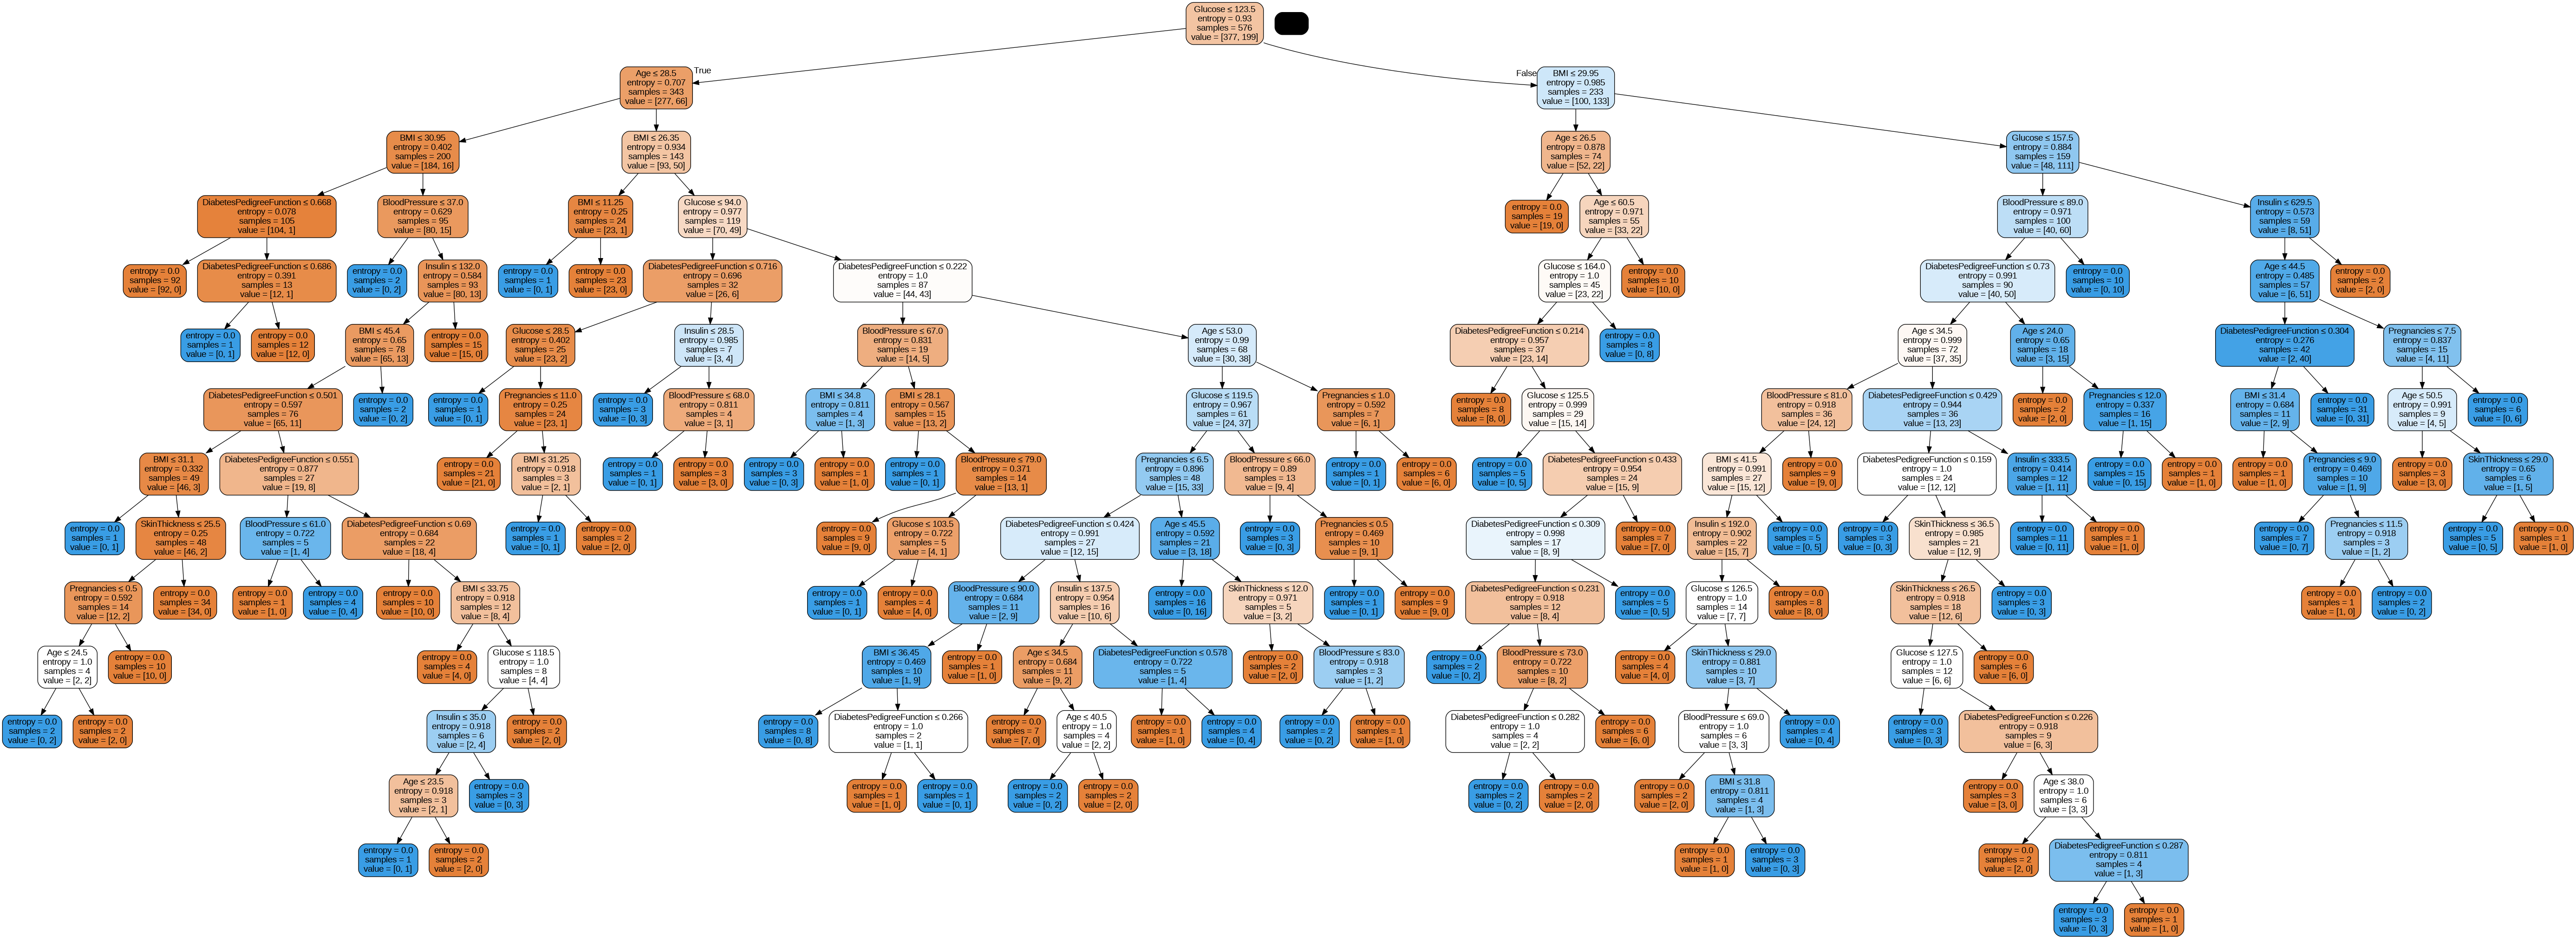

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus
from PIL import Image
from IPython.display import Image 
from six import StringIO

dot_data = StringIO()
tree.export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=df_plot.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Optimizing Decision Tree Performance**

Try out different parameter values for optimizing the accuracy on max_deapth ,criterion etc

In [ ]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = rf_random = RandomizedSearchCV(estimator = tree, param_distributions = param_dist, n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Decision Tree Parameters: {'max_features': 'log2', 'max_depth': 9, 'criterion': 'gini', 'ccp_alpha': 0.01}
Best score is 0.7273913043478262


In [ ]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(max_features= 'log2', max_depth= 9, criterion= 'gini', ccp_alpha= 0.01)
# Train Decision Tree Classifer
classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[101  22]
 [ 29  40]]


0.734375

**Visualizing Decision Trees**

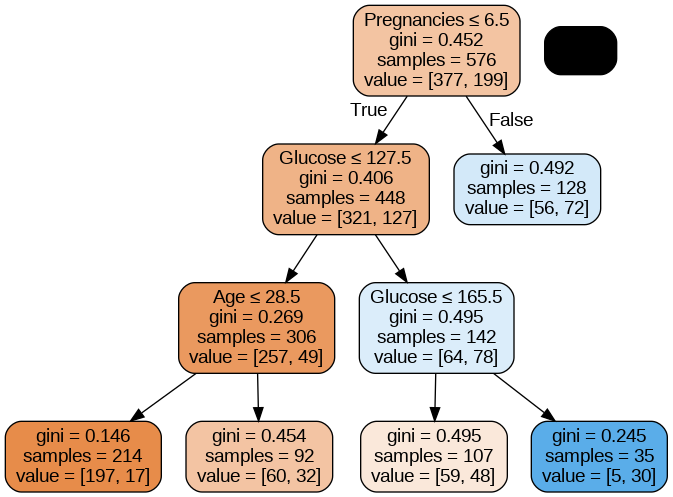

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus
from PIL import Image
from IPython.display import Image 
from six import StringIO

dot_data = StringIO()
tree.export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=df_plot.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Implement Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create RandomForest Tree classifer object
classifier=RandomForestClassifier(random_state=0)
# Train RandomForest Tree Classifer
classifier.fit(X_train,y_train)
#Predict the response for test dataset
y_pred=classifier.predict(X_test)
y_pred2=classifier.predict(X_train)
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import confusion_matrix, accuracy_score
print('Testing Accuracy',accuracy_score(y_test, y_pred))
print('Training Accuracy',accuracy_score(y_train, y_pred2))

Testing Accuracy 0.7864583333333334
Training Accuracy 1.0


If the model overfitting try out different way to fix it!!

In [ ]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Setup the parameters and distributions to sample from: param_dist
g_range = np.random.uniform(0.0, 0.3, 5).astype(float)
C_range = np.random.normal(1, 0.1, 5).astype(float)

C_range[C_range < 0] = 0.0001


param_dist={'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# Instantiate a Decision Tree classifier: tree
tree = RandomForestClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = rf_random = RandomizedSearchCV(estimator = tree, param_distributions = param_dist, n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Tuned Decision Tree Parameters: {'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Best score is 0.7708095952023988


In [ ]:
# Create RandomForest Tree classifer object
classifier=RandomForestClassifier(n_estimators= 1600, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 20, bootstrap= True)
# Train RandomForest Tree Classifer
classifier.fit(X_train,y_train)
#Predict the response for test dataset
y_pred=classifier.predict(X_test)
y_pred2=classifier.predict(X_train)
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import confusion_matrix, accuracy_score
print('Testing Accuracy',accuracy_score(y_test, y_pred))
print('Training Accuracy',accuracy_score(y_train, y_pred2))

Testing Accuracy 0.765625
Training Accuracy 0.9739583333333334


### All the best!!! I hope you will Enjoy the Task!